In [58]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [30]:
df = pd.read_csv('../data_obtain/bs_mutspecs_allel.csv', index_col=0)

In [31]:
df.head()

,14279A_0,15653C_0,15653C_2,15653C_3,15653C_4,15653C_5,15653C_7,15653C_8,15855A_0,15855A_1,...,16029A_0,15934C_0,13797A_0,14354A_0,14742G_0,13809A_0,13818C_0,14962A_0,16065G_0,14613C_0
allel,,,,,,,,,,,,,,,,,,,,,
14279A_0,0.000000,0.000001,0.002743,0.000267,0.003964,0.007622,0.005226,0.024278,0.000004,0.000223,...,4.616251e-09,1.110649e-08,2.409883e-08,2.742579e-08,1.654493e-08,6.414083e-09,1.922036e-08,1.287430e-08,1.500107e-08,1.183996e-08
15653C_0,0.000001,0.000000,0.002829,0.000300,0.003993,0.007782,0.005251,0.024204,0.000005,0.000241,...,1.167313e-06,1.091305e-06,1.155621e-06,9.447282e-07,1.175411e-06,1.275891e-06,1.099420e-06,1.067606e-06,1.036806e-06,1.165684e-06
15653C_2,0.002743,0.002829,0.000000,0.001603,0.006194,0.004057,0.009164,0.033645,0.002783,0.002297,...,2.743426e-03,2.747691e-03,2.742359e-03,2.755971e-03,2.744246e-03,2.740267e-03,2.753226e-03,2.749694e-03,2.746419e-03,2.746057e-03
15653C_3,0.000267,0.000300,0.001603,0.000000,0.003243,0.005999,0.006007,0.024721,0.000266,0.000392,...,2.677358e-04,2.692795e-04,2.679803e-04,2.706505e-04,2.670737e-04,2.660365e-04,2.690775e-04,2.690926e-04,2.694285e-04,2.678872e-04
15653C_4,0.003964,0.003993,0.006194,0.003243,0.000000,0.014731,0.015209,0.012585,0.003838,0.005277,...,3.970325e-03,3.974597e-03,3.975919e-03,3.966008e-03,3.962095e-03,3.965962e-03,3.963758e-03,3.967738e-03,3.975214e-03,3.969703e-03


In [32]:
allel_1 = []
allel_2 = []
cos_dist = []
for index, row in df.iterrows():
    for column in df.columns:
        allel_1.append(index)
        allel_2.append(column)
        cos_dist.append(df[column][index])

In [33]:
cosin_compare_df = pd.DataFrame({'allel_1':allel_1, 'allel_2':allel_2, 'cos_dist':cos_dist})

In [34]:
cosin_compare_df = cosin_compare_df.sort_values(by=['cos_dist'], ascending=False)

In [35]:
cosin_compare_df = cosin_compare_df.reset_index(drop=True)

In [36]:
cosin_compare_df.head()

,allel_1,allel_2,cos_dist
0,15450A_2,15909G_4,0.304556
1,15909G_4,15450A_2,0.304556
2,15153C_3,15450A_2,0.300425
3,15450A_2,15153C_3,0.300425
4,15909G_4,13767A_3,0.294891


<Axes: >

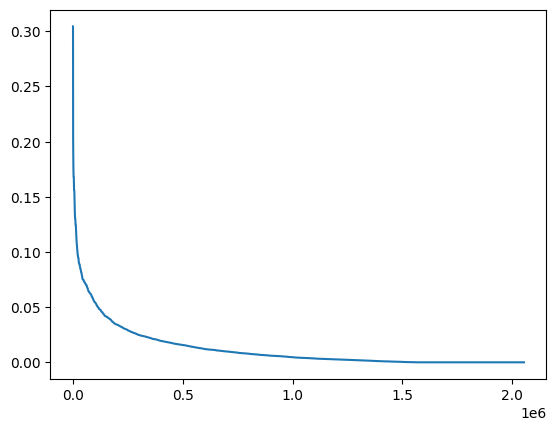

In [37]:
cosin_compare_df['cos_dist'].plot()

In [38]:
highest_dist_dup = cosin_compare_df[cosin_compare_df['cos_dist']>0.1]

In [39]:
for index, row in highest_dist_dup.iterrows():
    al1 = highest_dist_dup['allel_1'][index]
    al2 = highest_dist_dup['allel_2'][index]
    
    if ((highest_dist_dup['allel_2'] == al1) & (highest_dist_dup['allel_1'] == al2)).any():
        #highest_dist_dup = highest_dist_dup.mask(highest_dist_dup['allel_1'] == al1 and highest_dist_dup['allel_2'] == al2)
        highest_dist_dup['allel_1'][index] = 'drop'

C:\Users\voron\AppData\Local\Temp\ipykernel_6988\2278257952.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highest_dist_dup['allel_1'][index] = 'drop'


In [40]:
highest_dist = highest_dist_dup[highest_dist_dup['allel_1']!='drop'].reset_index(drop=True)

In [41]:
highest_dist

,allel_1,allel_2,cos_dist
0,15909G_4,15450A_2,0.304556
1,15450A_2,15153C_3,0.300425
2,13767A_3,15909G_4,0.294891
3,15016C_2,15450A_2,0.294285
4,14499G_4,15450A_2,0.294011
...,...,...,...
9692,13670C_4,13773C_3,0.100027
9693,14820C_2,13993C_0,0.100026
9694,14119C_24,15951C_14,0.100021
9695,16162C_1,14767C_1,0.100020


In [42]:
with open('../data_obtain/allel_st.txt', 'r') as file:
    s_t = file.read()

subtrees = json.loads(s_t)

In [43]:
highest_dist['al1_nnodes'] = 0
highest_dist['al2_nnodes'] = 0
for index,row in highest_dist.iterrows():
    al1_name = highest_dist['allel_1'][index].split('_')[0]
    al2_name = highest_dist['allel_2'][index].split('_')[0]
    
    al1_num = int(highest_dist['allel_1'][index].split('_')[1])
    al2_num = int(highest_dist['allel_2'][index].split('_')[1])
    
    highest_dist['al1_nnodes'][index] = len(subtrees[al1_name][al1_num][0])
    highest_dist['al2_nnodes'][index] = len(subtrees[al2_name][al2_num][0])

C:\Users\voron\AppData\Local\Temp\ipykernel_6988\3917771843.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highest_dist['al1_nnodes'][index] = len(subtrees[al1_name][al1_num][0])
C:\Users\voron\AppData\Local\Temp\ipykernel_6988\3917771843.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highest_dist['al2_nnodes'][index] = len(subtrees[al2_name][al2_num][0])


In [44]:
highest_dist

,allel_1,allel_2,cos_dist,al1_nnodes,al2_nnodes
0,15909G_4,15450A_2,0.304556,145,88
1,15450A_2,15153C_3,0.300425,88,49
2,13767A_3,15909G_4,0.294891,57,145
3,15016C_2,15450A_2,0.294285,33,88
4,14499G_4,15450A_2,0.294011,59,88
...,...,...,...,...,...
9692,13670C_4,13773C_3,0.100027,39,44
9693,14820C_2,13993C_0,0.100026,37,7
9694,14119C_24,15951C_14,0.100021,47,56
9695,16162C_1,14767C_1,0.100020,101,51


In [45]:
pol_pos = [*range(13442,16237)]

In [46]:
pol_pos_df = pd.DataFrame({'pos':pol_pos})

In [53]:
pol_pos_df['num_app'] = 0
nuc_1 = []
nuc_2 = []

for index, row in highest_dist.iterrows():
    pos_al1 = int(highest_dist['allel_1'][index].split('_')[0][:-1])
    pos_al2 = int(highest_dist['allel_2'][index].split('_')[0][:-1])
    
    pol_pos_df.loc[pol_pos_df['pos'] == pos_al1,'num_app'] += 1
    pol_pos_df.loc[pol_pos_df['pos'] == pos_al2,'num_app'] += 1
    
    nuc_1.append(str(highest_dist['allel_1'][index].split('_')[0][-1]))
    nuc_2.append(str(highest_dist['allel_2'][index].split('_')[0][-1]))

In [54]:
pol_pos_df

,pos,num_app
0,13442,4
1,13443,0
2,13444,4
3,13445,17
4,13446,0
...,...,...
2790,16232,0
2791,16233,0
2792,16234,0
2793,16235,23


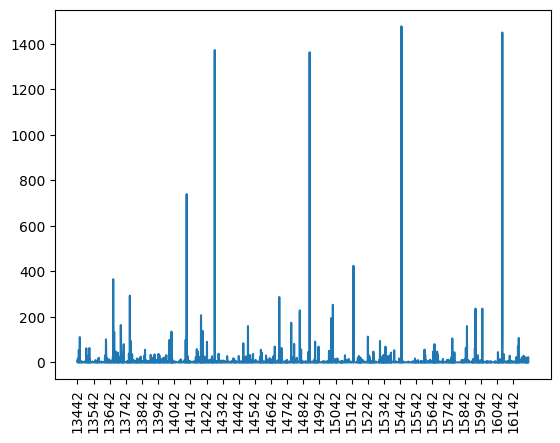

In [55]:
x = [*pol_pos_df.index]
#y = pol_pos_df['num_app']
label = np.arange(min(pol_pos_df['pos']), max(pol_pos_df['pos'])+1, 100)

plt.plot(pol_pos_df['num_app'])
#plt.xticks(x, label, rotation ='vertical')
plt.xticks(np.arange(min(x), max(x)+1, 100), label, rotation ='vertical')
plt.show()
plt.close()

In [59]:
nuc = nuc_1 + nuc_2
Counter(nuc)

Counter({'G': 5617, 'A': 6951, 'C': 6826})

In [ ]:
# orf_pos_df.loc[(orf_pos_df['pos'] >= 266) & (orf_pos_df['pos']<= 805),'sum_prot'] = 'leader protein'
# orf_pos_df.loc[(orf_pos_df['pos'] >= 806) & (orf_pos_df['pos']<= 2719),'sum_prot'] = 'nsp2'
# orf_pos_df.loc[(orf_pos_df['pos'] >= 2720) & (orf_pos_df['pos']<= 8554),'sum_prot'] = 'nsp3'
# orf_pos_df.loc[(orf_pos_df['pos'] >= 8555) & (orf_pos_df['pos']<= 10054),'sum_prot'] = 'nsp4'
# orf_pos_df.loc[(orf_pos_df['pos'] >= 10055) & (orf_pos_df['pos']<= 10972),'sum_prot'] = '3C-like proteinase'
# orf_pos_df.loc[(orf_pos_df['pos'] >= 10973) & (orf_pos_df['pos']<= 11842),'sum_prot'] = 'nsp6_TM'
# orf_pos_df.loc[(orf_pos_df['pos'] >= 11843) & (orf_pos_df['pos']<= 12091),'sum_prot'] = 'nsp7'
# orf_pos_df.loc[(orf_pos_df['pos'] >= 12092) & (orf_pos_df['pos']<= 12685),'sum_prot'] = 'nsp8'
# orf_pos_df.loc[(orf_pos_df['pos'] >= 12686) & (orf_pos_df['pos']<= 13024),'sum_prot'] = 'nsp9'
# orf_pos_df.loc[(orf_pos_df['pos'] >= 13025) & (orf_pos_df['pos']<= 13441),'sum_prot'] = 'nsp10'
# orf_pos_df.loc[(orf_pos_df['pos'] >= 13442) & (orf_pos_df['pos']<= 16236),'sum_prot'] = 'RNA-dependent RNA polymerase'
# orf_pos_df.loc[(orf_pos_df['pos'] >= 16237) & (orf_pos_df['pos']<= 18039),'sum_prot'] = 'helicase'
# orf_pos_df.loc[(orf_pos_df['pos'] >= 18040) & (orf_pos_df['pos']<= 19620),'sum_prot'] = '3-to-5 exonuclease'
# orf_pos_df.loc[(orf_pos_df['pos'] >= 19621) & (orf_pos_df['pos']<= 20658),'sum_prot'] = 'endoRNAse'
# orf_pos_df.loc[(orf_pos_df['pos'] >= 20659) & (orf_pos_df['pos']<= 21552),'sum_prot'] = '2-O-ribose methyltransferase'